# Ejercicios 2
## Partes 1 y 2

### 1. Crea una caja en $2d$ de tamaño $1000$ con las siguientes distribuciones:

Nota: Todas las funciones siguientes dan por hecho que el espacio es $2d$ y que los lados de la caja van de $0$ al tamaño deseado. O sea, no hay valores negativos en los ejes y las cajas son todas cuadradas.

#### a) puntos en una malla cuadriculada de distancia ($10x10$ cada retícula)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
def unif_cuad_dist(box_size, dist):
    X = np.arange(0.0, box_size + 1.0, dist)
    Y = np.zeros(int(box_size / dist) + 1)
    malla_x = np.arange(0.0, box_size + 1.0, dist)
    
    for x in malla_x:
        y = x * np.ones(int(box_size / dist) + 1)
        X = np.concatenate((X, malla_x), axis = None)
        Y = np.concatenate((Y, y), axis = None)
    
    return X, Y

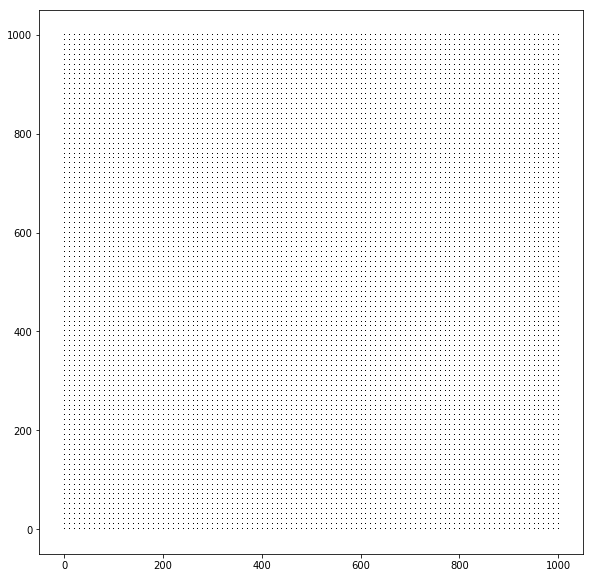

In [3]:
X, Y = unif_cuad_dist(1000.0, 10.0)
plt.figure(figsize = (10, 10))
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')

#### b) 1000 puntos sobre un disco de radio 300

In [4]:
def disc_dist(box_size, n_points, radius, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = radius * random.random()
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)
    
        X.append(x)
        Y.append(y)
        
    return X, Y

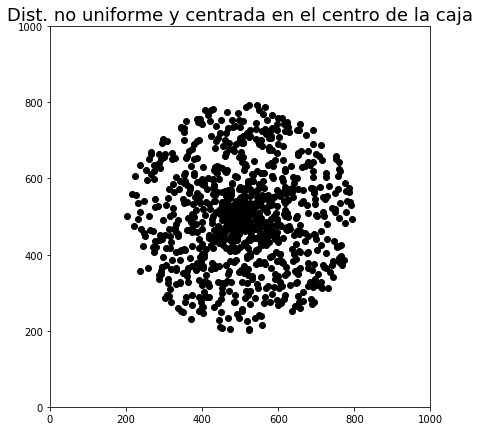

In [5]:
box_size = 1000
X, Y = disc_dist(box_size, 1000, 300.0, box_size / 2.0, box_size / 2.0)

plt.figure(figsize = (7, 7))
plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. no uniforme y centrada en el centro de la caja', fontsize = 18);

In [6]:
def unif_disc_dist(box_size, n_points, radius, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = pow(random.randrange(0, radius**2, 1), 0.5)
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)

        X.append(x)
        Y.append(y)
        
    return X, Y

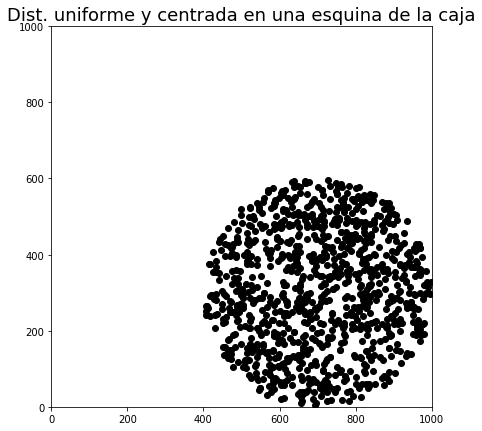

In [7]:
box_size = 1000
radius = 300.0
X, Y = unif_disc_dist(box_size, 1000, radius, box_size - radius, radius)

plt.figure(figsize = (7, 7))
plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. uniforme y centrada en una esquina de la caja', fontsize = 18);

#### c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290 

In [8]:
def anillo_dist(box_size, n_points, r_int, r_ext, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = r_int + (r_ext - r_int) * random.random()
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)
    
        X.append(x)
        Y.append(y)
    
    return X, Y

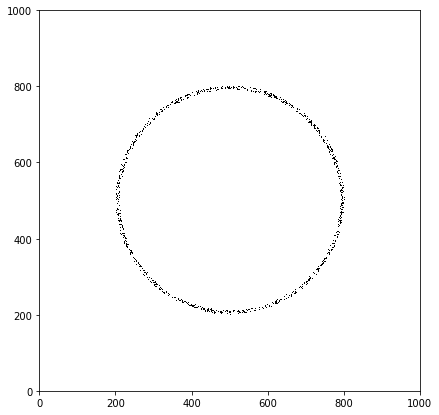

In [9]:
box_size = 1000
X, Y = anillo_dist(box_size, 1000, 290.0, 300.0, box_size / 2.0, box_size / 2.0)
        
plt.figure(figsize = (7, 7))
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size]);
plt.ylim([0, box_size]);

#### d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

In [10]:
def draw_ring(x_0, y_0, radius, n_points):
    X = []
    Y = []
    delta = 2.0 * math.pi / float(n_points)
    
    for i in range(n_points):
        theta = i * delta
        x = x_0 + radius * math.cos(theta)
        y = y_0 + radius * math.sin(theta)
        
        X.append(x)
        Y.append(y)
        
    return X, Y

In [11]:
# Sin condiciones periódicas. Ningún anillo se sale de la caja.
def rand_circles_dist(box_size, n_rings, n_points_p_ring):
    radius = float(box_size) * random.random() / 2.0
    x_0 = radius + (box_size - 2.0 * radius) * random.random()
    y_0 = radius + (box_size - 2.0 * radius) * random.random()
    X, Y = draw_ring(x_0, y_0, radius, n_points_p_ring)
    
    for i in range(n_rings - 1):
        radius = float(box_size) * random.random() / 2.0
        x_0 = radius + (box_size - 2.0 * radius) * random.random()
        y_0 = radius + (box_size - 2.0 * radius) * random.random()
        x_c, y_c = draw_ring(x_0, y_0, radius, n_points_p_ring)
        X = np.concatenate((X, x_c), axis = None)
        Y = np.concatenate((Y, y_c), axis = None)
        
    return X, Y

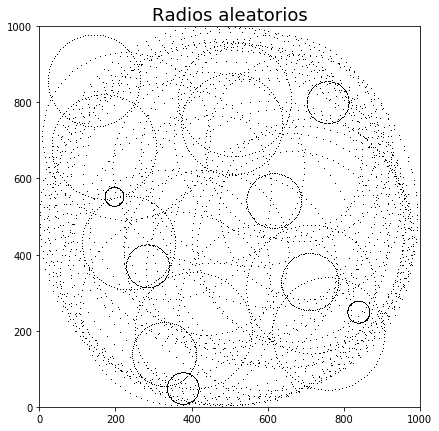

In [12]:
box_size = 1000
X, Y = rand_circles_dist(box_size, 50, 100)

plt.figure(figsize = (7, 7))
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title("Radios aleatorios", fontsize = 18);

In [13]:
# Sin condiciones periódicas. Ningún anillo se sale de la caja.
def unif_circles_dist(box_size, n_rings, n_points_p_ring, r_ring):
    x_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
    y_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
    X, Y = draw_ring(x_0, y_0, r_ring, n_points_p_ring)
    
    for i in range(n_rings - 1):
        x_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
        y_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
        x_c, y_c = draw_ring(x_0, y_0, r_ring, n_points_p_ring)
        X = np.concatenate((X, x_c), axis = None)
        Y = np.concatenate((Y, y_c), axis = None)
        
    return X, Y

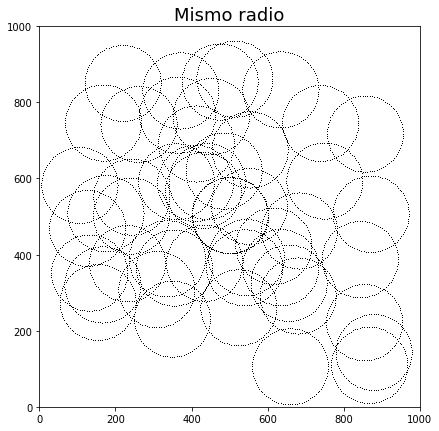

In [14]:
box_size = 1000
X, Y = unif_circles_dist(box_size, 50, 100, 100.0)

plt.figure(figsize = (7, 7))
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title("Mismo radio", fontsize = 18);

### 2. Haz un algoritmo que calcule la función de correlación con $\frac{DD}{RR} - 1$ con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de *bin*, y observa qué ocurre.

In [15]:
# Función que genera una dist. aleatoria de puntos
def create_rand_dist(box_size, n_points):
    X = []
    Y = []
    
    for i in range(n_points):
        X.append(box_size * random.random())
        Y.append(box_size * random.random())
        
    return X, Y

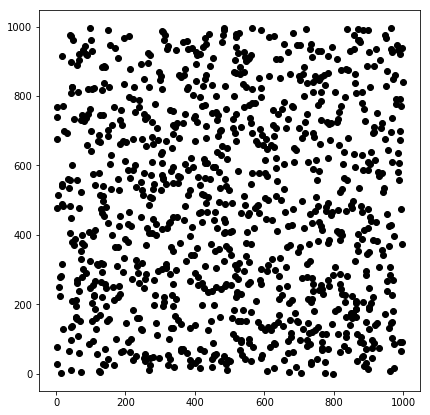

In [16]:
# Veamos qué tan aleatorio luce
x_rand, y_rand = create_rand_dist(1000.0, 1000)

plt.figure(figsize = (7, 7))
plt.plot(x_rand, y_rand, 'ko')
plt.gca().set_aspect('equal')

In [17]:
# Función que genera el histograma de las distancias.
# Éstas las devuelve solo por si quiero graficar. Tal vez
# haya una mejor forma de hacerlo.
def save_hist(x_data, y_data, box_size, bin_size):
    max_dist = math.sqrt(2.0 * box_size**2)
    n_points = len(x_data)
    distances = []
    bins = np.arange(0.0, max_dist, bin_size)
    
    for i in range(n_points - 1):
        for j in range(i + 1, n_points):
            distance = math.sqrt((x_data[i] - x_data[j])**2 + (y_data[i] - y_data[j])**2)
            distances.append(distance)
    
    histo = np.histogram(distances, bins = bins)
    return distances, histo

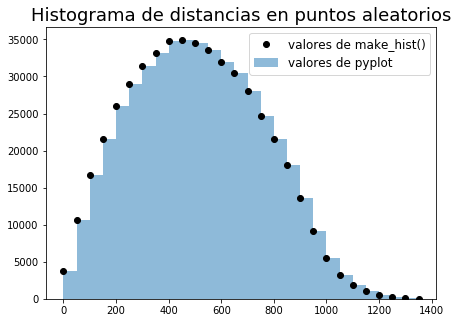

In [39]:
# Comprobando que mi función guarde bien los datos
rand_dists, rand_histo = save_hist(x_rand, y_rand, 1000, 50.0)
rand_frec = histo[0]
rand_bins = histo[1]
# Como rand_frec y rand_bins no son del mismo tamaño y
# es muy probable que el último bin quede vacío, lo elimino
rand_bins = rand_bins[:-1]

plt.figure(figsize = (7, 5))
plt.hist(rand_dists, bins = rand_bins, alpha = 0.5, label = 'valores de pyplot');
plt.plot(rand_bins, rand_frec, 'ko', label = 'valores de make_hist()')
plt.legend(fontsize = 12)
plt.title('Histograma de distancias en puntos aleatorios', fontsize = 18);

In [40]:
# Función que calcula la correlación DD/RR - 1
# Mismo número de puntos, tamaño de caja y de bin para RR y DD
def simple_correlation(DD, box_size, n_points, bin_size):
    x_RR, y_RR = create_rand_dist(box_size, n_points)
    dist_RR, histo_RR = save_hist(x_RR, y_RR, box_size, bin_size)
    RR = histo_RR[0]
    
    return DD / RR - 1.0

Text(0.5,1,'Correlación DD/RR - 1 para DD aleatorio')

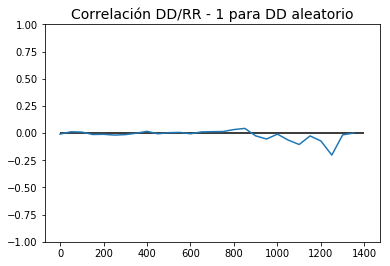

In [48]:
# Probando mi función de correlación con la dist.
# aleatoria creada unas celdas arriba
f_corr = simple_correlation(rand_frec, 1000, 1000, 50.0)

plt.plot(rand_bins, f_corr)
plt.hlines(0.0, 0.0, 1400.0) # Trampa. Ya sé cuál es la distancia máxima, je
plt.ylim([-1.0, 1.0])
plt.title('Correlación DD/RR - 1 para DD aleatorio', fontsize = 14)

Trabaja bastante bien, siempre que no encuentre bins vacíos, porque entonces hay división entre cero y la gráfica se va a infinito. Se observa que se aleja más de cero a distancias más grandes.

Lo de experimentar con número de puntos y tamaño de bin lo dejo para después.

Las funciones creadas en esta notebook se han guardado en un archivo llamado _distros.py_